In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 10 cities (you can change or add more)
cities = np.array([
    [0, 0],
    [1, 5],
    [5, 2],
    [6, 6],
    [8, 3],
    [7, 9],
    [2, 7],
    [3, 3],
    [9, 6],
    [4, 8]
])
num_cities = len(cities)


In [3]:
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

distance_matrix = np.zeros((num_cities, num_cities))
for i in range(num_cities):
    for j in range(num_cities):
        distance_matrix[i][j] = euclidean_distance(cities[i], cities[j])


In [4]:
num_ants = 10
num_iterations = 100
alpha = 1.0     # pheromone importance
beta = 5.0      # distance importance
evaporation_rate = 0.5
pheromone_constant = 100.0

pheromone = np.ones((num_cities, num_cities))


In [5]:
def choose_next_city(current_city, visited, pheromone, distance):
    probabilities = []
    for city in range(num_cities):
        if city in visited:
            probabilities.append(0)
        else:
            tau = pheromone[current_city][city] ** alpha
            eta = (1 / distance[current_city][city]) ** beta
            probabilities.append(tau * eta)
    
    probabilities = probabilities / np.sum(probabilities)
    return np.random.choice(range(num_cities), p=probabilities)


In [6]:
best_distance = float('inf')
best_tour = []

for iteration in range(num_iterations):
    all_tours = []
    all_lengths = []

    for ant in range(num_ants):
        visited = []
        current_city = random.randint(0, num_cities - 1)
        visited.append(current_city)

        while len(visited) < num_cities:
            next_city = choose_next_city(current_city, visited, pheromone, distance_matrix)
            visited.append(next_city)
            current_city = next_city

        visited.append(visited[0])  # return to start
        all_tours.append(visited)

        length = 0
        for i in range(len(visited) - 1):
            length += distance_matrix[visited[i]][visited[i + 1]]
        all_lengths.append(length)

        if length < best_distance:
            best_distance = length
            best_tour = visited

    # Pheromone evaporation
    pheromone *= (1 - evaporation_rate)

    # Pheromone update
    for tour, length in zip(all_tours, all_lengths):
        for i in range(len(tour) - 1):
            pheromone[tour[i]][tour[i + 1]] += pheromone_constant / length


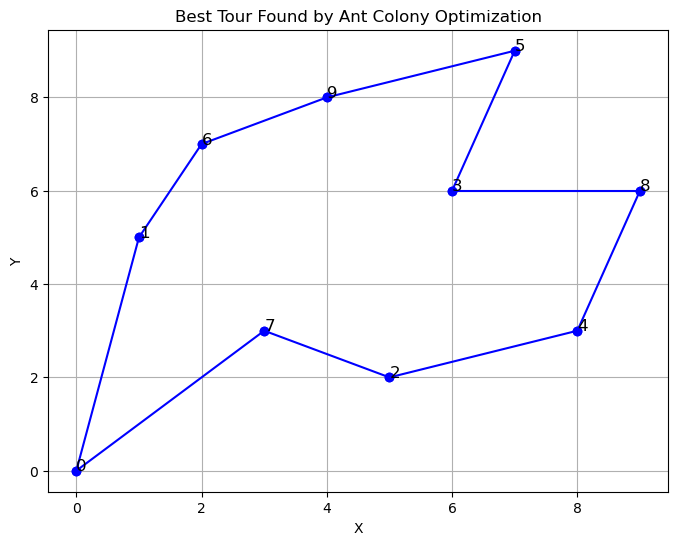

In [7]:
def plot_route(route, cities):
    plt.figure(figsize=(8, 6))
    for i in range(len(route) - 1):
        start = cities[route[i]]
        end = cities[route[i + 1]]
        plt.plot([start[0], end[0]], [start[1], end[1]], 'bo-')
    for i, city in enumerate(cities):
        plt.text(city[0], city[1], f'{i}', fontsize=12)
    plt.title("Best Tour Found by Ant Colony Optimization")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.show()

plot_route(best_tour, cities)


In [8]:
print("Best path:", best_tour)
print("Best path length:", best_distance)


Best path: [0, 1, 6, 9, 5, 3, 8, 4, 2, 7, 0]
Best path length: 31.698974773884952
